In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/processed/processed.csv')

In [3]:
drop = ['E_17', 'E_145', 'E_11', 'E_183', 'E_195', 'E_142', 'E_32', 'E_23']

df = df.drop(drop, axis=1)

In [4]:
df.head()

,E_0,E_1,E_10,E_100,E_101,E_102,E_103,E_104,E_105,E_106,...,E_93,E_94,E_95,E_96,E_97,E_98,E_99,pathology,age,sex
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Anemia,55,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Panic attack,10,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,Influenza,68,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Anemia,13,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Boerhaave,48,1


In [5]:
df.shape

(130391, 209)

In [6]:
from collections import Counter

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) 

In [27]:
# Extract features and target variable
y = df["pathology"]  # Target variable
X = df.drop("pathology", axis=1)  # Features



In [9]:
Counter(y)

Counter({'URTI': 8457,
         'Viral pharyngitis': 8223,
         'Anemia': 6736,
         'HIV (initial infection)': 3768,
         'Pulmonary embolism': 3651,
         'Anaphylaxis': 3647,
         'Localized edema': 3613,
         'Influenza': 3511,
         'Bronchitis': 3448,
         'Pneumonia': 3396,
         'Acute otitis media': 3369,
         'GERD': 3344,
         'Acute laryngitis': 3334,
         'Panic attack': 3237,
         'Acute dystonic reactions': 3205,
         'Pericarditis': 3032,
         'Possible NSTEMI / STEMI': 2943,
         'Sarcoidosis': 2934,
         'Cluster headache': 2841,
         'Unstable angina': 2748,
         'Chronic rhinosinusitis': 2717,
         'Inguinal hernia': 2614,
         'Pancreatic neoplasm': 2582,
         'Atrial fibrillation': 2542,
         'Guillain-Barré syndrome': 2516,
         'Acute pulmonary edema': 2500,
         'PSVT': 2363,
         'Stable angina': 2340,
         'Bronchiectasis': 2319,
         'Scombroid food p

In [28]:
# Oversample the minority class using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)


In [29]:
from collections import Counter

Counter(y_resampled)

Counter({'Anemia': 8457,
         'Panic attack': 8457,
         'Influenza': 8457,
         'Boerhaave': 8457,
         'Bronchospasm / acute asthma exacerbation': 8457,
         'Allergic sinusitis': 8457,
         'Acute otitis media': 8457,
         'Pulmonary embolism': 8457,
         'Viral pharyngitis': 8457,
         'Myasthenia gravis': 8457,
         'Bronchiectasis': 8457,
         'SLE': 8457,
         'Bronchitis': 8457,
         'Pneumonia': 8457,
         'Inguinal hernia': 8457,
         'Acute dystonic reactions': 8457,
         'Acute rhinosinusitis': 8457,
         'Pericarditis': 8457,
         'Atrial fibrillation': 8457,
         'Anaphylaxis': 8457,
         'HIV (initial infection)': 8457,
         'URTI': 8457,
         'Chronic rhinosinusitis': 8457,
         'Cluster headache': 8457,
         'Stable angina': 8457,
         'Spontaneous pneumothorax': 8457,
         'Acute laryngitis': 8457,
         'Pulmonary neoplasm': 8457,
         'Myocarditis': 8457,
 

In [32]:
len(y_resampled), len(X_resampled)

(414393, 414393)

In [13]:
""" a = pd.read_csv('Data/processed/processed+resampled.csv')

y = a["pathology"]  # Target variable
X = a.drop("pathology", axis=1)  # Features """

' a = pd.read_csv(\'Data/processed/processed+resampled.csv\')\n\ny = a["pathology"]  # Target variable\nX = a.drop("pathology", axis=1)  # Features '

In [14]:
from sklearn.preprocessing import OneHotEncoder


In [31]:
encoder = OneHotEncoder()

encoder.fit(y_resampled.values.reshape(-1, 1))

y_resampled = encoder.transform(y_resampled.values.reshape(-1, 1)).toarray()


In [33]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((290075, 208), (124318, 208), (290075, 49), (124318, 49))

In [34]:
# Train a random forest classifier

from sklearn.ensemble import RandomForestClassifier

In [35]:
# Train a random forest classifier

clf = RandomForestClassifier(random_state=42)

In [36]:
# Train the classifier

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Save the trained model
""" import joblib

filename = 'Models/rf_model(p+r_csv).sav'

joblib.dump(clf, filename) """

['Models/rf_model(p+r_csv).sav']

In [38]:
#important features

feature_importances = clf.feature_importances_

len(feature_importances)

208

In [39]:
#Sort the important features and their corresponding columns as a dictionary

feature_importances_dict = dict(zip(X_train.columns, feature_importances))
feature_importances_dict = dict(sorted(feature_importances_dict.items(), key=lambda item: item[1], reverse=True))
feature_importances_dict = {k: v*100 for k, v in feature_importances_dict.items()}
feature_importances_dict = {k: round(v, 2) for k, v in feature_importances_dict.items()}
feature_importances_dict

{'E_53': 2.43,
 'age': 2.36,
 'E_151': 1.97,
 'E_57': 1.94,
 'E_134': 1.76,
 'E_194': 1.67,
 'E_166': 1.65,
 'E_181': 1.52,
 'E_91': 1.41,
 'E_201': 1.35,
 'E_132': 1.31,
 'E_77': 1.24,
 'E_214': 1.24,
 'E_79': 1.23,
 'E_212': 1.21,
 'E_220': 1.16,
 'E_0': 1.16,
 'E_66': 1.15,
 'E_216': 1.11,
 'E_196': 1.09,
 'E_129': 1.07,
 'E_25': 1.04,
 'E_41': 0.96,
 'E_155': 0.94,
 'E_135': 0.93,
 'E_50': 0.92,
 'E_209': 0.92,
 'E_211': 0.92,
 'E_123': 0.91,
 'E_218': 0.9,
 'E_3': 0.89,
 'E_73': 0.88,
 'E_21': 0.88,
 'E_148': 0.87,
 'E_45': 0.85,
 'E_124': 0.84,
 'E_169': 0.84,
 'E_131': 0.82,
 'E_116': 0.79,
 'E_69': 0.76,
 'E_92': 0.75,
 'E_191': 0.75,
 'E_157': 0.75,
 'E_105': 0.74,
 'E_18': 0.74,
 'E_9': 0.73,
 'E_203': 0.72,
 'E_97': 0.71,
 'E_222': 0.71,
 'E_226': 0.7,
 'E_78': 0.7,
 'E_227': 0.69,
 'E_120': 0.68,
 'E_184': 0.68,
 'E_162': 0.67,
 'E_13': 0.66,
 'E_187': 0.65,
 'E_65': 0.65,
 'E_161': 0.64,
 'E_108': 0.64,
 'E_217': 0.61,
 'E_175': 0.61,
 'E_14': 0.59,
 'E_51': 0.59,
 'E_106'

In [40]:
unbalanced_feature_importances_dict = {'E_53': 2.03,
 'E_57': 2.02,
 'E_97': 2.01,
 'E_41': 1.86,
 'E_151': 1.82,
 'E_50': 1.6,
 'E_132': 1.51,
 'E_134': 1.49,
 'E_222': 1.47,
 'E_49': 1.44,
 'E_227': 1.43,
 'E_77': 1.37,
 'E_212': 1.35,
 'E_181': 1.25,
 'E_48': 1.25,
 'E_135': 1.21,
 'E_144': 1.19,
 'E_91': 1.19,
 'E_201': 1.18,
 'E_45': 1.17,
 'E_129': 1.15,
 'age': 1.08,
 'E_3': 1.05,
 'E_79': 1.04,
 'E_66': 1.04,
 'E_123': 1.02,
 'E_25': 1.02,
 'E_196': 0.96,
 'E_214': 0.89,
 'E_215': 0.88,
 'E_209': 0.86,
 'E_106': 0.85,
 'E_0': 0.8,
 'E_155': 0.78,
 'E_24': 0.78,
 'E_116': 0.76,
 'E_120': 0.76,
 'E_220': 0.75,
 'E_105': 0.75,
 'E_146': 0.73,
 'E_148': 0.72,
 'E_208': 0.71,
 'E_108': 0.7,
 'E_7': 0.69,
 'E_13': 0.69,
 'E_78': 0.69,
 'E_114': 0.68,
 'E_184': 0.68,
 'E_218': 0.68,
 'E_1': 0.66,
 'E_9': 0.66,
 'E_131': 0.65,
 'E_115': 0.64,
 'E_194': 0.63,
 'E_162': 0.63,
 'E_14': 0.62,
 'E_113': 0.61,
 'E_173': 0.61,
 'E_161': 0.61,
 'E_157': 0.6,
 'E_69': 0.59,
 'E_226': 0.57,
 'E_18': 0.57,
 'E_12': 0.56,
 'E_124': 0.56,
 'E_42': 0.54,
 'E_211': 0.54,
 'E_2': 0.54,
 'E_88': 0.54,
 'E_217': 0.53,
 'E_104': 0.53,
 'E_81': 0.53,
 'E_191': 0.51,
 'E_26': 0.5,
 'E_169': 0.5,
 'E_65': 0.49,
 'E_98': 0.49,
 'E_187': 0.49,
 'E_219': 0.46,
 'E_203': 0.46,
 'E_82': 0.46,
 'E_223': 0.45,
 'E_125': 0.45,
 'E_137': 0.45,
 'E_147': 0.43,
 'E_189': 0.43,
 'E_70': 0.41,
 'E_175': 0.41,
 'E_27': 0.4,
 'E_15': 0.4,
 'E_118': 0.4,
 'E_92': 0.39,
 'E_164': 0.39,
 'E_198': 0.39,
 'E_89': 0.38,
 'E_22': 0.37,
 'E_94': 0.37,
 'E_62': 0.37,
 'E_103': 0.36,
 'E_31': 0.36,
 'E_111': 0.36,
 'E_210': 0.35,
 'E_154': 0.35,
 'E_80': 0.34,
 'E_71': 0.34,
 'E_159': 0.34,
 'E_190': 0.34,
 'E_171': 0.34,
 'E_61': 0.34,
 'E_126': 0.34,
 'E_21': 0.34,
 'E_225': 0.32,
 'E_83': 0.32,
 'E_63': 0.31,
 'E_140': 0.31,
 'E_51': 0.31,
 'E_143': 0.3,
 'E_168': 0.3,
 'E_84': 0.3,
 'E_52': 0.3,
 'E_76': 0.3,
 'E_188': 0.3,
 'E_179': 0.29,
 'E_197': 0.29,
 'E_170': 0.28,
 'E_34': 0.28,
 'E_47': 0.28,
 'E_46': 0.28,
 'E_5': 0.27,
 'E_205': 0.27,
 'E_72': 0.26,
 'E_193': 0.26,
 'E_16': 0.26,
 'E_221': 0.25,
 'E_64': 0.25,
 'E_8': 0.25,
 'E_119': 0.25,
 'E_185': 0.24,
 'E_6': 0.24,
 'E_216': 0.23,
 'E_44': 0.23,
 'E_93': 0.23,
 'E_20': 0.22,
 'E_33': 0.22,
 'E_180': 0.22,
 'E_110': 0.21,
 'E_160': 0.21,
 'E_30': 0.21,
 'E_101': 0.21,
 'E_38': 0.21,
 'E_127': 0.2,
 'E_67': 0.2,
 'E_128': 0.2,
 'E_192': 0.19,
 'E_28': 0.19,
 'E_86': 0.19,
 'E_182': 0.19,
 'E_19': 0.18,
 'E_43': 0.18,
 'E_224': 0.18,
 'E_174': 0.18,
 'E_213': 0.17,
 'E_138': 0.17,
 'E_109': 0.17,
 'E_60': 0.17,
 'E_172': 0.17,
 'E_177': 0.16,
 'E_150': 0.16,
 'E_166': 0.16,
 'E_121': 0.16,
 'E_35': 0.15,
 'E_206': 0.14,
 'E_204': 0.13,
 'E_87': 0.13,
 'E_165': 0.13,
 'E_139': 0.13,
 'E_96': 0.13,
 'E_95': 0.12,
 'sex': 0.11,
 'E_156': 0.11,
 'E_200': 0.11,
 'E_74': 0.1,
 'E_102': 0.1,
 'E_207': 0.1,
 'E_107': 0.1,
 'E_149': 0.09,
 'E_153': 0.09,
 'E_176': 0.09,
 'E_199': 0.07,
 'E_10': 0.06,
 'E_90': 0.06,
 'E_163': 0.06,
 'E_186': 0.06,
 'E_99': 0.05,
 'E_37': 0.05,
 'E_167': 0.05,
 'E_75': 0.05,
 'E_202': 0.04,
 'E_29': 0.04,
 'E_4': 0.04,
 'E_158': 0.03,
 'E_40': 0.03,
 'E_112': 0.03,
 'E_100': 0.02,
 'E_141': 0.02,
 'E_73': 0.02,
 'E_178': 0.02,
 'E_39': 0.01}

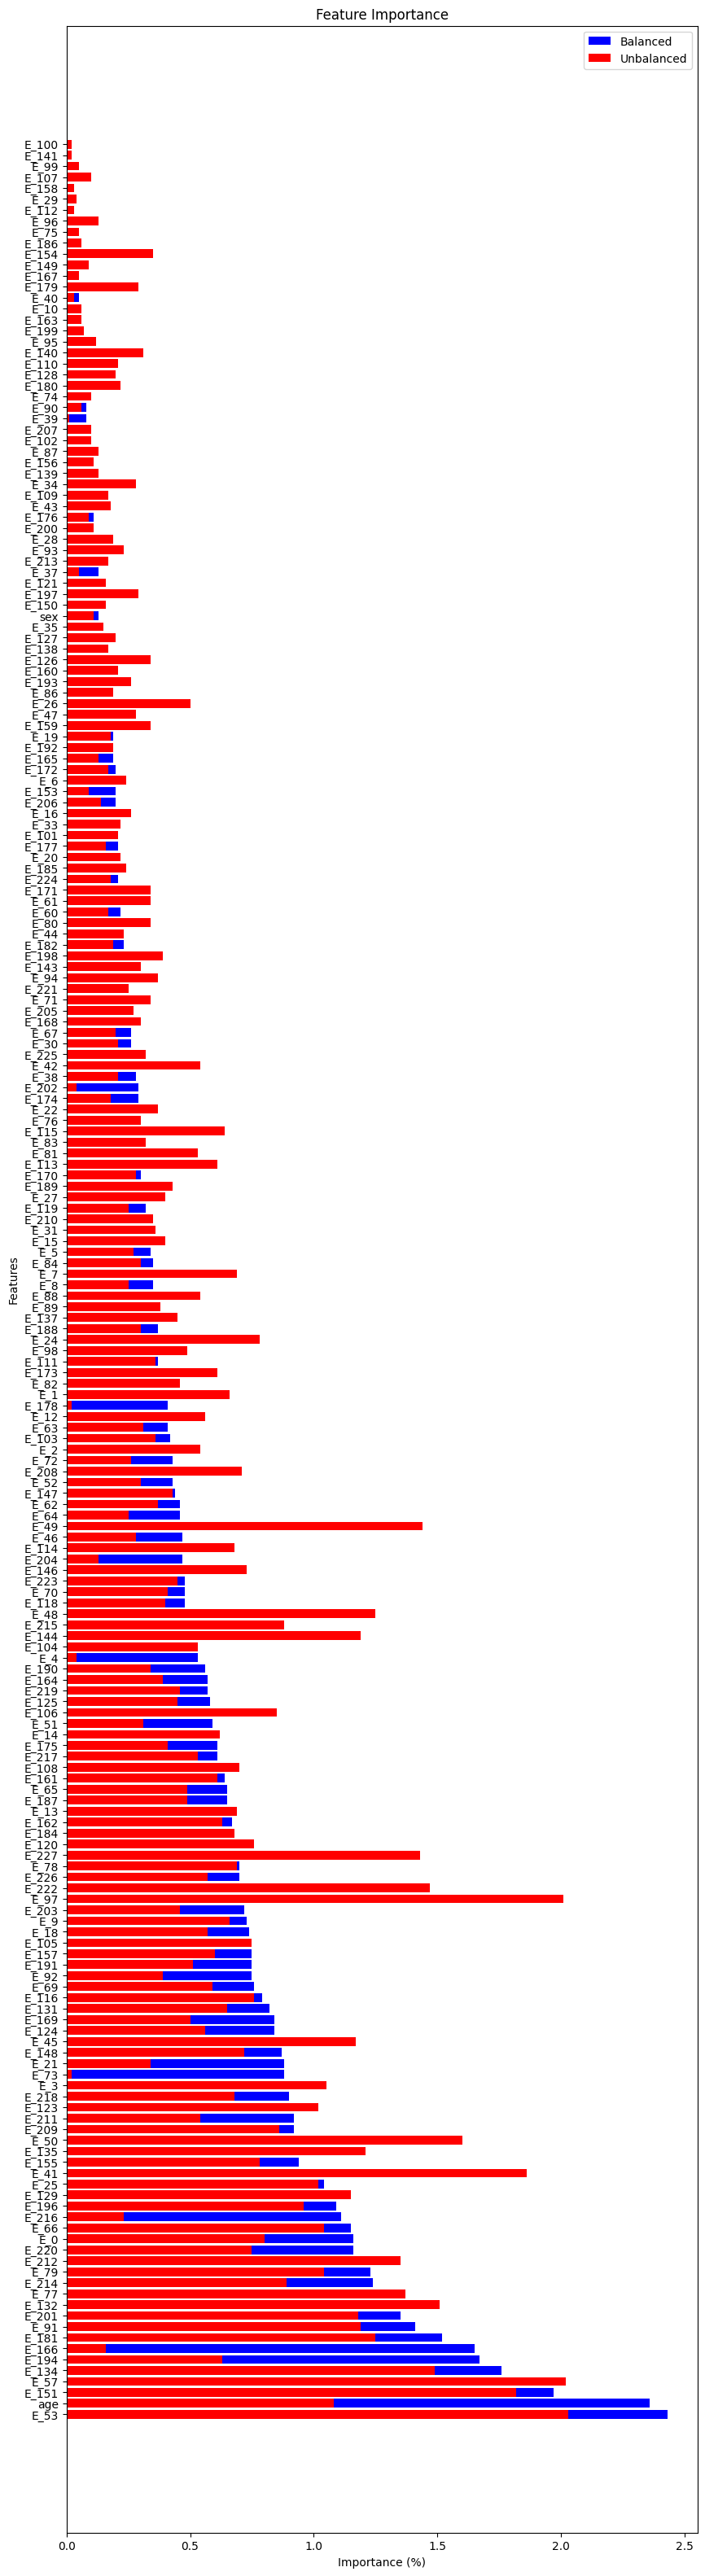

In [41]:
#compare the important features of the balanced and unbalanced datasets

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 40))

ax.barh(list(feature_importances_dict.keys()), list(feature_importances_dict.values()), color='b', label='Balanced')
ax.barh(list(unbalanced_feature_importances_dict.keys()), list(unbalanced_feature_importances_dict.values()), color='r', label='Unbalanced')
ax.set_xlabel('Importance (%)')
ax.set_ylabel('Features')
ax.set_title('Feature Importance')
ax.legend()
plt.show()


In [42]:
# judge the classifier

y_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [44]:
#accuracy score

accuracy_score(y_test, y_pred)

0.9945462443089497

In [49]:
#cross validation score

cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")

KeyboardInterrupt: 

In [47]:
# classification report

print(classification_report(y_test, y_pred, zero_division= 1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2530
           1       1.00      1.00      1.00      2494
           2       0.99      0.99      0.99      2511
           3       0.99      1.00      0.99      2557
           4       1.00      1.00      1.00      2488
           5       0.93      0.90      0.91      2614
           6       1.00      1.00      1.00      2524
           7       1.00      1.00      1.00      2551
           8       1.00      1.00      1.00      2522
           9       1.00      1.00      1.00      2457
          10       1.00      1.00      1.00      2494
          11       1.00      1.00      1.00      2600
          12       1.00      1.00      1.00      2573
          13       1.00      0.99      1.00      2556
          14       1.00      1.00      1.00      2536
          15       1.00      1.00      1.00      2511
          16       0.90      0.93      0.91      2570
          17       1.00    

In [48]:
#roc_auc_score

roc_auc_score(y_test, y_pred)

0.9972663090465484